# 머신러닝 프로젝트 

## 타이타닉 생존자 예측모델 개발

- 데이터 : 
  - 제공 데이터 파일 : titanic3.csv
  - 훈련/검증용 데이터 : 평가 데이터 = 8 : 2
  - 훈련/검증용 데이터로 모델 학습 및 검증하고 평가 데이터는 최종 평가에만 사용


- 모델 개발 방법 :
  - 데이터 전처리 및 탐색적 분석을 통하여 파생변수 최소 2개 이상 개발
  - 알고리즘은 최소한 3개 이상 적용(Decision Tree, Random Forest, Logistic Regression은 필수)


- 훈련 및 평가 방법 :
  - GridSearchCV API를 활용하여 교차검증 및 최적 하이퍼파라미터 찾아서 학습 및 검증 수행


- 결과물 제출 : 이메일
 


## import

In [14]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns

# retrieve data

In [150]:
df=pd.read_csv('titanic3.csv')
display(df.head(15))
# 80%의 데이터를 뽑아 나머지 20%의 데이터를 예측해보는 것
# pclass : 선실, survived : 생존여부, name : 이름, sex:성별, age : 나이, sibsp : 동반형제 배우자, parch : 동반부모 자식, ticket : 티켓의 고유 넘버 fare : 요금
# carbin : 객실번호, embarked : 승선항, boat : 구명보트, body : 몸식별번호, home/dest : 출발지/목적지
# 중복된 정보 : X
# 필요한 정보 : survived, pclass, sex, age, boat, sibsp, parch
# null처리 columns : 
# 가공할 columns : 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


# Analysis

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  hp_bin     1291 non-null   category
 15  fare_bin   1291 non-null   category
dtypes: category(2), float64(3), int64(4), object(7)
memory usage: 146.1+ KB


In [89]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# correlation
## SurvivalRate fuc

In [128]:
def SurvivalRate(a,b):
    s = df[[a,'survived']].loc[(df['survived']==1)&(df[a]==b)].count()[0]
    d = df[[a,'survived']].loc[(df['survived']==0)&(df[a]==b)].count()[0]
    SurvivalRate=s/(s+d)
    return SurvivalRate

## SurvivalRate by pclass

In [131]:
print(SurvivalRate('pclass',1))
print(SurvivalRate('pclass',2))
print(SurvivalRate('pclass',3))

0.6191950464396285
0.4296028880866426
0.2552891396332863


## SurvivalRate by sex

In [141]:
print(SurvivalRate('sex','female'))
print(SurvivalRate('sex','male'))

0.7274678111587983
0.19098457888493475


## SurvivalRate by age

In [171]:
df['age']=df['age'].astype('float')
df['age'].max()
display(df['age'])

count, bin_dividers = np.histogram(df['age'], bins=[0,10,20,30,40,50,60,70,81])
print(bin_dividers)
print(count)

bin_names = ['0s','10s','20s','30s','40s','50s','60s','70s']

df['age_bin'] = pd.cut(x=df['age'],bins=bin_dividers,labels=bin_names,include_lowest=True)


display(df[['age','age_bin']].head(10))

df[['age_bin','survived']]

0       29.00
1        0.92
2        2.00
3       30.00
4       25.00
        ...  
1304    14.50
1305      NaN
1306    26.50
1307    27.00
1308    29.00
Name: age, Length: 1309, dtype: float64

[ 0 10 20 30 40 50 60 70 81]
[ 82 143 344 232 135  70  32   8]


,age,age_bin
0,29.00,20s
1,0.92,0s
2,2.00,0s
3,30.00,20s
4,25.00,20s
5,48.00,40s
6,63.00,60s
7,39.00,30s
8,53.00,50s
9,71.00,70s


,age_bin,survived
0,20s,1
1,0s,1
2,0s,0
3,20s,0
4,20s,0
...,...,...
1304,10s,0
1305,NaN,0
1306,20s,0
1307,20s,0


In [174]:
print(SurvivalRate('age_bin','0s'))
print(SurvivalRate('age_bin','10s'))
print(SurvivalRate('age_bin','20s'))
print(SurvivalRate('age_bin','30s'))
print(SurvivalRate('age_bin','40s'))
print(SurvivalRate('age_bin','50s'))
print(SurvivalRate('age_bin','60s'))
print(SurvivalRate('age_bin','70s'))
print(SurvivalRate('age_bin','80s'))

0.5813953488372093
0.3950617283950617
0.37119113573407203
0.4238095238095238
0.3939393939393939
0.4838709677419355
0.2222222222222222
0.3333333333333333
nan


## SurvivalRate by sibsp

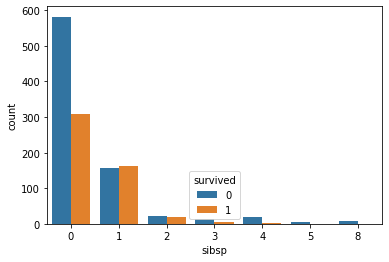

In [67]:
f_plot=sns.countplot(x='sibsp',hue='survived', data=df) # sibsp당 생존률을 계산하여 변환 예정

In [123]:
print(SurvivalRate('sibsp',0))
print(SurvivalRate('sibsp',1))
print(SurvivalRate('sibsp',2))
print(SurvivalRate('sibsp',3))
print(SurvivalRate('sibsp',4))
print(SurvivalRate('sibsp',5))
print(SurvivalRate('sibsp',8))

0.3468013468013468
0.5109717868338558
0.4523809523809524
0.3
0.13636363636363635
0.0
0.0


## SurvivalRate by parch

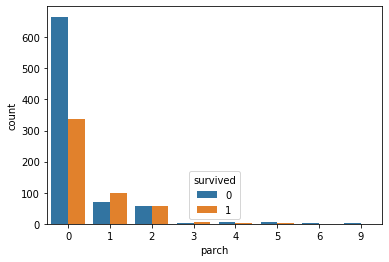

In [71]:
f_plot=sns.countplot(x='parch',hue='survived', data=df) #parch당 생존률을 계산하여 반영할 예정

In [124]:
print(SurvivalRate('parch',0))
print(SurvivalRate('parch',1))
print(SurvivalRate('parch',2))
print(SurvivalRate('parch',3))
print(SurvivalRate('parch',4))
print(SurvivalRate('parch',5))
print(SurvivalRate('parch',6))
print(SurvivalRate('parch',9))

0.33532934131736525
0.5882352941176471
0.504424778761062
0.625
0.16666666666666666
0.16666666666666666
0.0
0.0


## SurvivalRate by fare

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

[  0.          83.33333333 166.66666667 250.        ]
[1206   64   21]


,fare,fare_bin
0,211.3375,expensive
1,151.5500,middle
2,151.5500,middle
3,151.5500,middle
4,151.5500,middle
5,26.5500,cheap
6,77.9583,cheap
7,0.0000,cheap
8,51.4792,cheap
9,49.5042,cheap


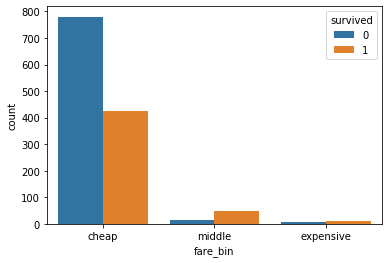

In [52]:
df['fare']=df['fare'].astype('float')
display(df['fare'])
# np.histogram 함수로 3개의 bin으로 나눈는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['fare'], range=[0,250], bins=3)
print(bin_dividers)
print(count)

#3개의 bin에 이름 지정
bin_names = ['cheap','middle','expensive']

#pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['fare_bin'] = pd.cut(x=df['fare'],bins=bin_dividers,labels=bin_names,include_lowest=True)

#horsepower열, hp_bin열의 첫 15행 출력
display(df[['fare','fare_bin']].head(10))

df[['fare_bin','survived']]

f_plot=sns.countplot(x='fare_bin',hue='survived', data=df)

In [115]:
print(SurvivalRate('fare_bin','expensive'))
print(SurvivalRate('fare_bin','middle'))
print(SurvivalRate('fare_bin','cheap'))

0.5714285714285714
0.75
0.35323383084577115


In [134]:
print(SurvivalRate('pclass',1))
print(SurvivalRate('pclass',2))
print(SurvivalRate('pclass',3))

0.6191950464396285
0.4296028880866426
0.2552891396332863


## SurvivalRate by cabin

In [155]:
df['cabin'].isnull().sum() #null값이 많아서 무의미한 데이터로 취급

1014

## SurvivalRate by boat

In [151]:
df['boat'][df['boat'].notnull()]=1
df['boat'].fillna(0,inplace=True)
display(df['boat'].value_counts())

0    823
1    486
Name: boat, dtype: int64

In [152]:
print(SurvivalRate('boat',0))
print(SurvivalRate('boat',1))

0.027946537059538274
0.9814814814814815


## Not analyzed data
### name : 이름과 생존은 관계가 없다고 판단 
### ticket : 티켓의 이름과 생존은 관계가 없다고 판단
### embarked : 출발지와 생존은 관계가 없다고 판단
### body : 데이터의 중 빠진 데이터가 많고 생존에 큰 영향을 줄 수 없다고 판단.
### home.dest : 집과 도착지는 생존과 관계가 없다고 판단

# meaningful data

In [186]:
meaningful_df=df[['survived', 'pclass', 'sex', 'age_bin', 'boat', 'sibsp', 'parch']]
display(meaningful_df)

,survived,pclass,sex,age_bin,boat,sibsp,parch
0,1,1,female,20s,1,0,0
1,1,1,male,0s,1,1,2
2,0,1,female,0s,0,1,2
3,0,1,male,20s,0,1,2
4,0,1,female,20s,0,1,2
...,...,...,...,...,...,...,...
1304,0,3,female,10s,0,1,0
1305,0,3,female,NaN,0,1,0
1306,0,3,male,20s,0,0,0
1307,0,3,male,20s,0,0,0


# Null remove process(Age)

In [175]:
meaningful_df.isnull().sum()  #age

survived      0
pclass        0
sex           0
age         263
boat          0
sibsp         0
parch         0
dtype: int64

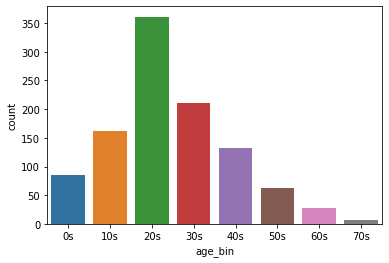

In [178]:
f_plot=sns.countplot(x='age_bin', data=df)

In [193]:
whole=meaningful_df['age_bin'].notnull().sum()
age_list=meaningful_df['age_bin'].value_counts(sort=False).to_list()

def Age_ratio(a):
    result=age_list[a]/whole
    return result

print(Age_ratio(0))
print(Age_ratio(1))
print(Age_ratio(2))
print(Age_ratio(3))
print(Age_ratio(4))
print(Age_ratio(5))
print(Age_ratio(6))
print(Age_ratio(7))

0.08221797323135756
0.15487571701720843
0.3451242829827916
0.20076481835564053
0.12619502868068833
0.05927342256214149
0.02581261950286807
0.0057361376673040155


In [203]:
age_null=meaningful_df['age_bin'].isnull().sum()

def Age_null_remove(a):
    result=Age_ratio(a)*age_null
    return result

print(Age_null_remove(0))
print(Age_null_remove(1))
print(Age_null_remove(2))
print(Age_null_remove(3))
print(Age_null_remove(4))
print(Age_null_remove(5))
print(Age_null_remove(6))
print(Age_null_remove(7))
print(age_null)
age_null_list=[21,41,91,53,33,16,7,1]

21.623326959847038
40.732313575525815
90.76768642447418
52.80114722753346
33.18929254302103
15.588910133843212
6.788718929254302
1.5086042065009562
263
